<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [58]:
# Drop all rows that are missing target values (average 4th grade Math scores)
df = df.dropna(subset=['AVG_MATH_4_SCORE'])

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   565 non-null    object 
 1   STATE                         565 non-null    object 
 2   YEAR                          565 non-null    int64  
 3   ENROLL                        398 non-null    float64
 4   TOTAL_REVENUE                 440 non-null    float64
 5   FEDERAL_REVENUE               440 non-null    float64
 6   STATE_REVENUE                 440 non-null    float64
 7   LOCAL_REVENUE                 440 non-null    float64
 8   TOTAL_EXPENDITURE             440 non-null    float64
 9   INSTRUCTION_EXPENDITURE       440 non-null    float64
 10  SUPPORT_SERVICES_EXPENDITURE  440 non-null    float64
 11  OTHER_EXPENDITURE             398 non-null    float64
 12  CAPITAL_OUTLAY_EXPENDITURE    440 non-null    float64
 13  GRAD

In [103]:
# Let's explore if columns "ENROLL" and "GRADES_ALL_G" actually contain comparable data, as the data set description suggests

# Calculate statistics for these two columns for each state
df_enroll = df.groupby("STATE")[["ENROLL", "GRADES_ALL_G"]].describe()

# Find the percentage difference between two columns
diff = abs(df_enroll["ENROLL"]["mean"] - df_enroll["GRADES_ALL_G"]["mean"]) / df_enroll["GRADES_ALL_G"]["mean"]

# Summarize what the difference is on average
print(f"On average, the percent difference is {diff.mean():.1%}")

# Percentage of states, that have a difference below 5% threshold
print(f"Percentage of states, that have a difference below 5%: { ( (diff <= 0.05).sum() ) / len(diff) :.1%}")

On average, the percent difference is 2.4%
Percentage of states, that have a difference below 5%: 88.7%


In [105]:
# We see, that these two columns indeed contain similar values
# Let's drop the "ENROLL", as it has more missing values
df = df.drop(columns="ENROLL")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 1714
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   565 non-null    object 
 1   STATE                         565 non-null    object 
 2   YEAR                          565 non-null    int64  
 3   TOTAL_REVENUE                 440 non-null    float64
 4   FEDERAL_REVENUE               440 non-null    float64
 5   STATE_REVENUE                 440 non-null    float64
 6   LOCAL_REVENUE                 440 non-null    float64
 7   TOTAL_EXPENDITURE             440 non-null    float64
 8   INSTRUCTION_EXPENDITURE       440 non-null    float64
 9   SUPPORT_SERVICES_EXPENDITURE  440 non-null    float64
 10  OTHER_EXPENDITURE             398 non-null    float64
 11  CAPITAL_OUTLAY_EXPENDITURE    440 non-null    float64
 12  GRADES_PK_G                   487 non-null    float64
 13  GRAD

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **Math 4**

**(hit `Enter` to edit)**

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [6]:
# Determine the number of unique entries in the "YEAR" column
num_unique_years = df["YEAR"].unique().size
print(f"There are {num_unique_years} different years of data in our dataset")

There are 33 different years of data in our dataset


Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [15]:
# Find Michigan's average predictor score across all years
MI_avg = (df["AVG_MATH_4_SCORE"][df["STATE"] == "MICHIGAN"]).mean()

# Find Ohio's average predictor score across all years
OH_avg = (df["AVG_MATH_4_SCORE"][df["STATE"] == "OHIO"]).mean()

# Boolean variable that denotes if Michigan has a higher average predictor score
MI_higher = MI_avg > OH_avg

# Print the result
print(f"{'Michigan' if MI_higher else 'Ohio'} has a higher average predictor score across all years")

Ohio has a higher average predictor score across all years


Find the average for your pedictor score across all states in 2019

In [19]:
avg_2019 = (df["AVG_MATH_4_SCORE"][df["YEAR"] == 2019]).mean()
print(f"Average of 4th grade Math scores across all states in 2019 is {avg_2019}")

Average of 4th grade Math scores across all states in 2019 is 239.9433962264151


Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [39]:
# Find the maximum predictor score for every state
max_scores = df.groupby("STATE")["AVG_MATH_4_SCORE"].max()

# Create a pandas dataframe out of that Series object (better visual)
pd.DataFrame(max_scores).rename(columns={"AVG_MATH_4_SCORE": "Maximum 4th grade Math test score"})

,Maximum 4th grade Math test score
STATE,
ALABAMA,233.0
ALASKA,237.0
ARIZONA,240.0
ARKANSAS,240.0
CALIFORNIA,235.0
COLORADO,247.0
CONNECTICUT,245.0
DELAWARE,243.0
DISTRICT_OF_COLUMBIA,235.0


<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [128]:
features = ["TOTAL_REVENUE", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE", "GRADES_ALL_G", "GRADES_4_G", "FRAC_INST_EXP", "INST_EXP_p/st"]
df["FRAC_INST_EXP"] = df["INSTRUCTION_EXPENDITURE"] / df["TOTAL_EXPENDITURE"]
df["INST_EXP_p/st"] = df["INSTRUCTION_EXPENDITURE"] / df["GRADES_ALL_G"]

Final feature list: **total revenue, total expenditure, instruction expenditure, total enrollment, enrollment in 4th grade, fraction of instruction expenditure in total state's expenditure, instruction expenditure per student**

Feature selection justification: **Features related to revenue and expenditure directly impact how much resourses schools have available, which ultimately most likely affects students' performance. Enrollment data may impact the performance too, as the number of students in the classroom affects ways, in which teachers interact with their students.**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

Text(0, 0.5, '4th grade Math test scores')

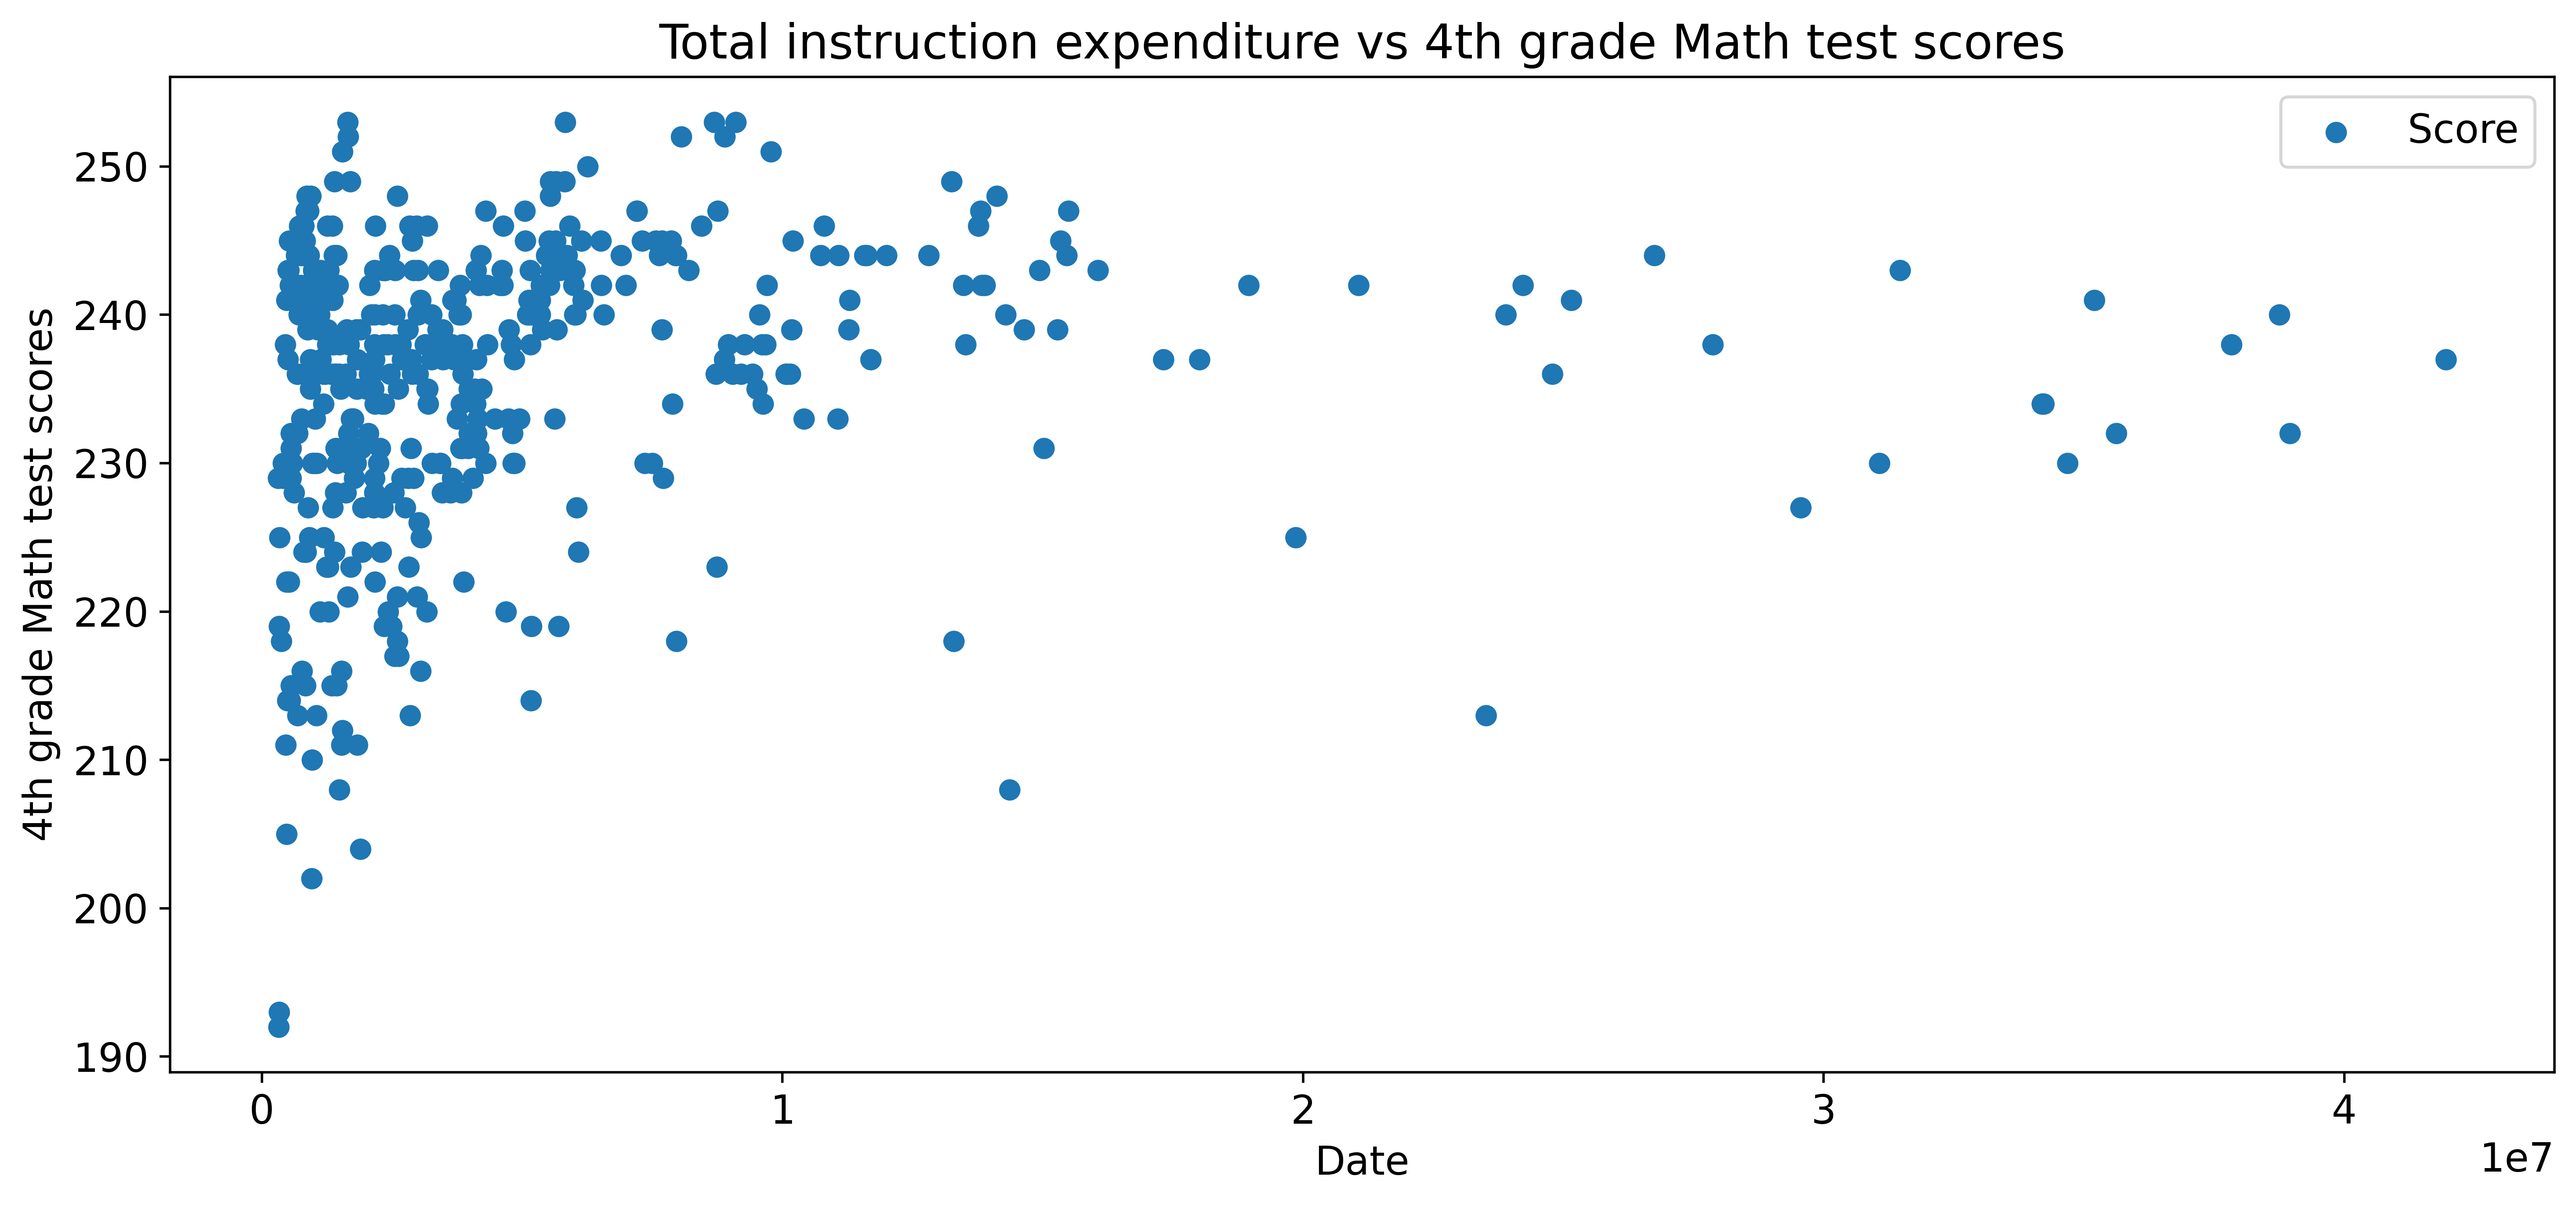

In [110]:
# Set plot size
plt.figure(figsize=(14, 6))

# Improve readability
plt.rcParams.update({"font.size": 13, "figure.dpi": 500})

# Plot data
plt.scatter(df["INSTRUCTION_EXPENDITURE"], df["AVG_MATH_4_SCORE"], label="Score")

# Display legend
plt.legend()

# Label the plot
plt.title("Total instruction expenditure vs 4th grade Math test scores")
plt.xlabel("Instruction expenditure")
plt.ylabel("4th grade Math test scores")

**Total instruction expenditure vs 4th grade Math test scores**

**Visualization 2**

Text(0, 0.5, '4th grade Math test scores')

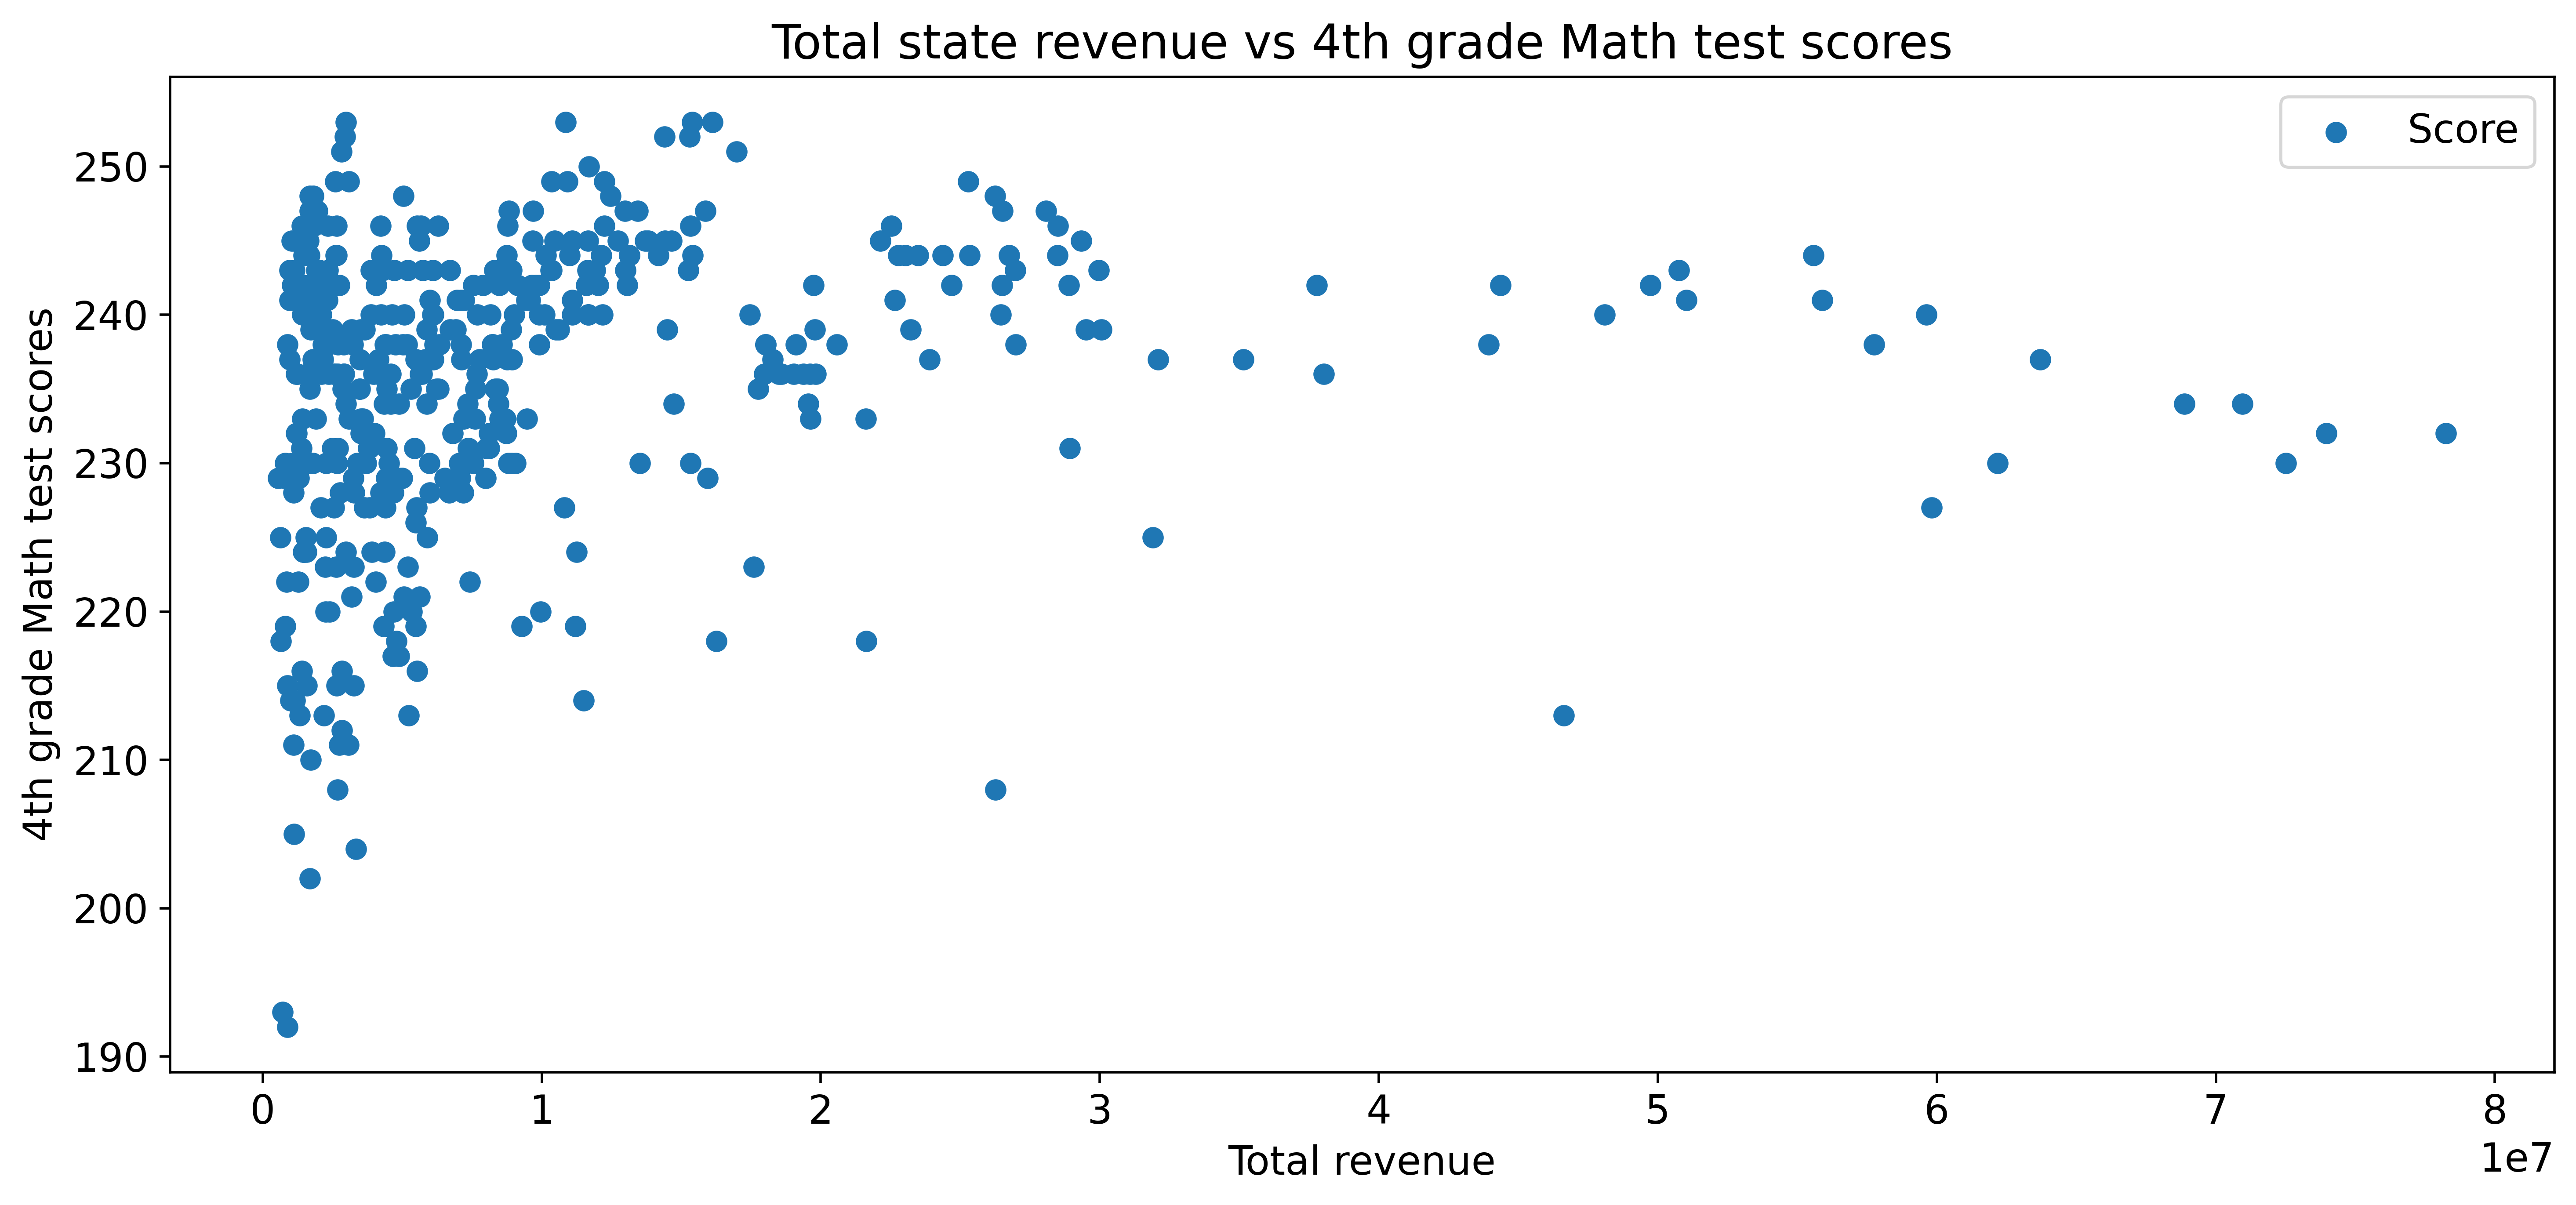

In [114]:
# Set plot size
plt.figure(figsize=(14, 6))

# Improve readability
plt.rcParams.update({"font.size": 13, "figure.dpi": 500})

# Plot data
plt.scatter(df["TOTAL_REVENUE"], df["AVG_MATH_4_SCORE"], label="Score")

# Display legend
plt.legend()

# Label the plot
plt.title("Total state revenue vs 4th grade Math test scores")
plt.xlabel("Total revenue")
plt.ylabel("4th grade Math test scores")

**Total state revenue vs 4th grade Math test scores**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [116]:
from sklearn.model_selection import train_test_split

In [132]:
X = df[features].dropna()
y = df.loc[X.index]["AVG_MATH_4_SCORE"]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.1, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **Regression**
<br>
We will try to predict the average 4th grade Math test scores

In [134]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [135]:
# create your model here
model = LinearRegression()

In [136]:
model.fit(X_train, y_train)

LinearRegression()

In [142]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.4869256131782179

In [ ]:
# FOR CLASSIFICATION ONLY:
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(model, X_test, y_test,
#                          cmap=plt.cm.Blues)

Text(0, 0.5, 'Average 4th grade Math test score')

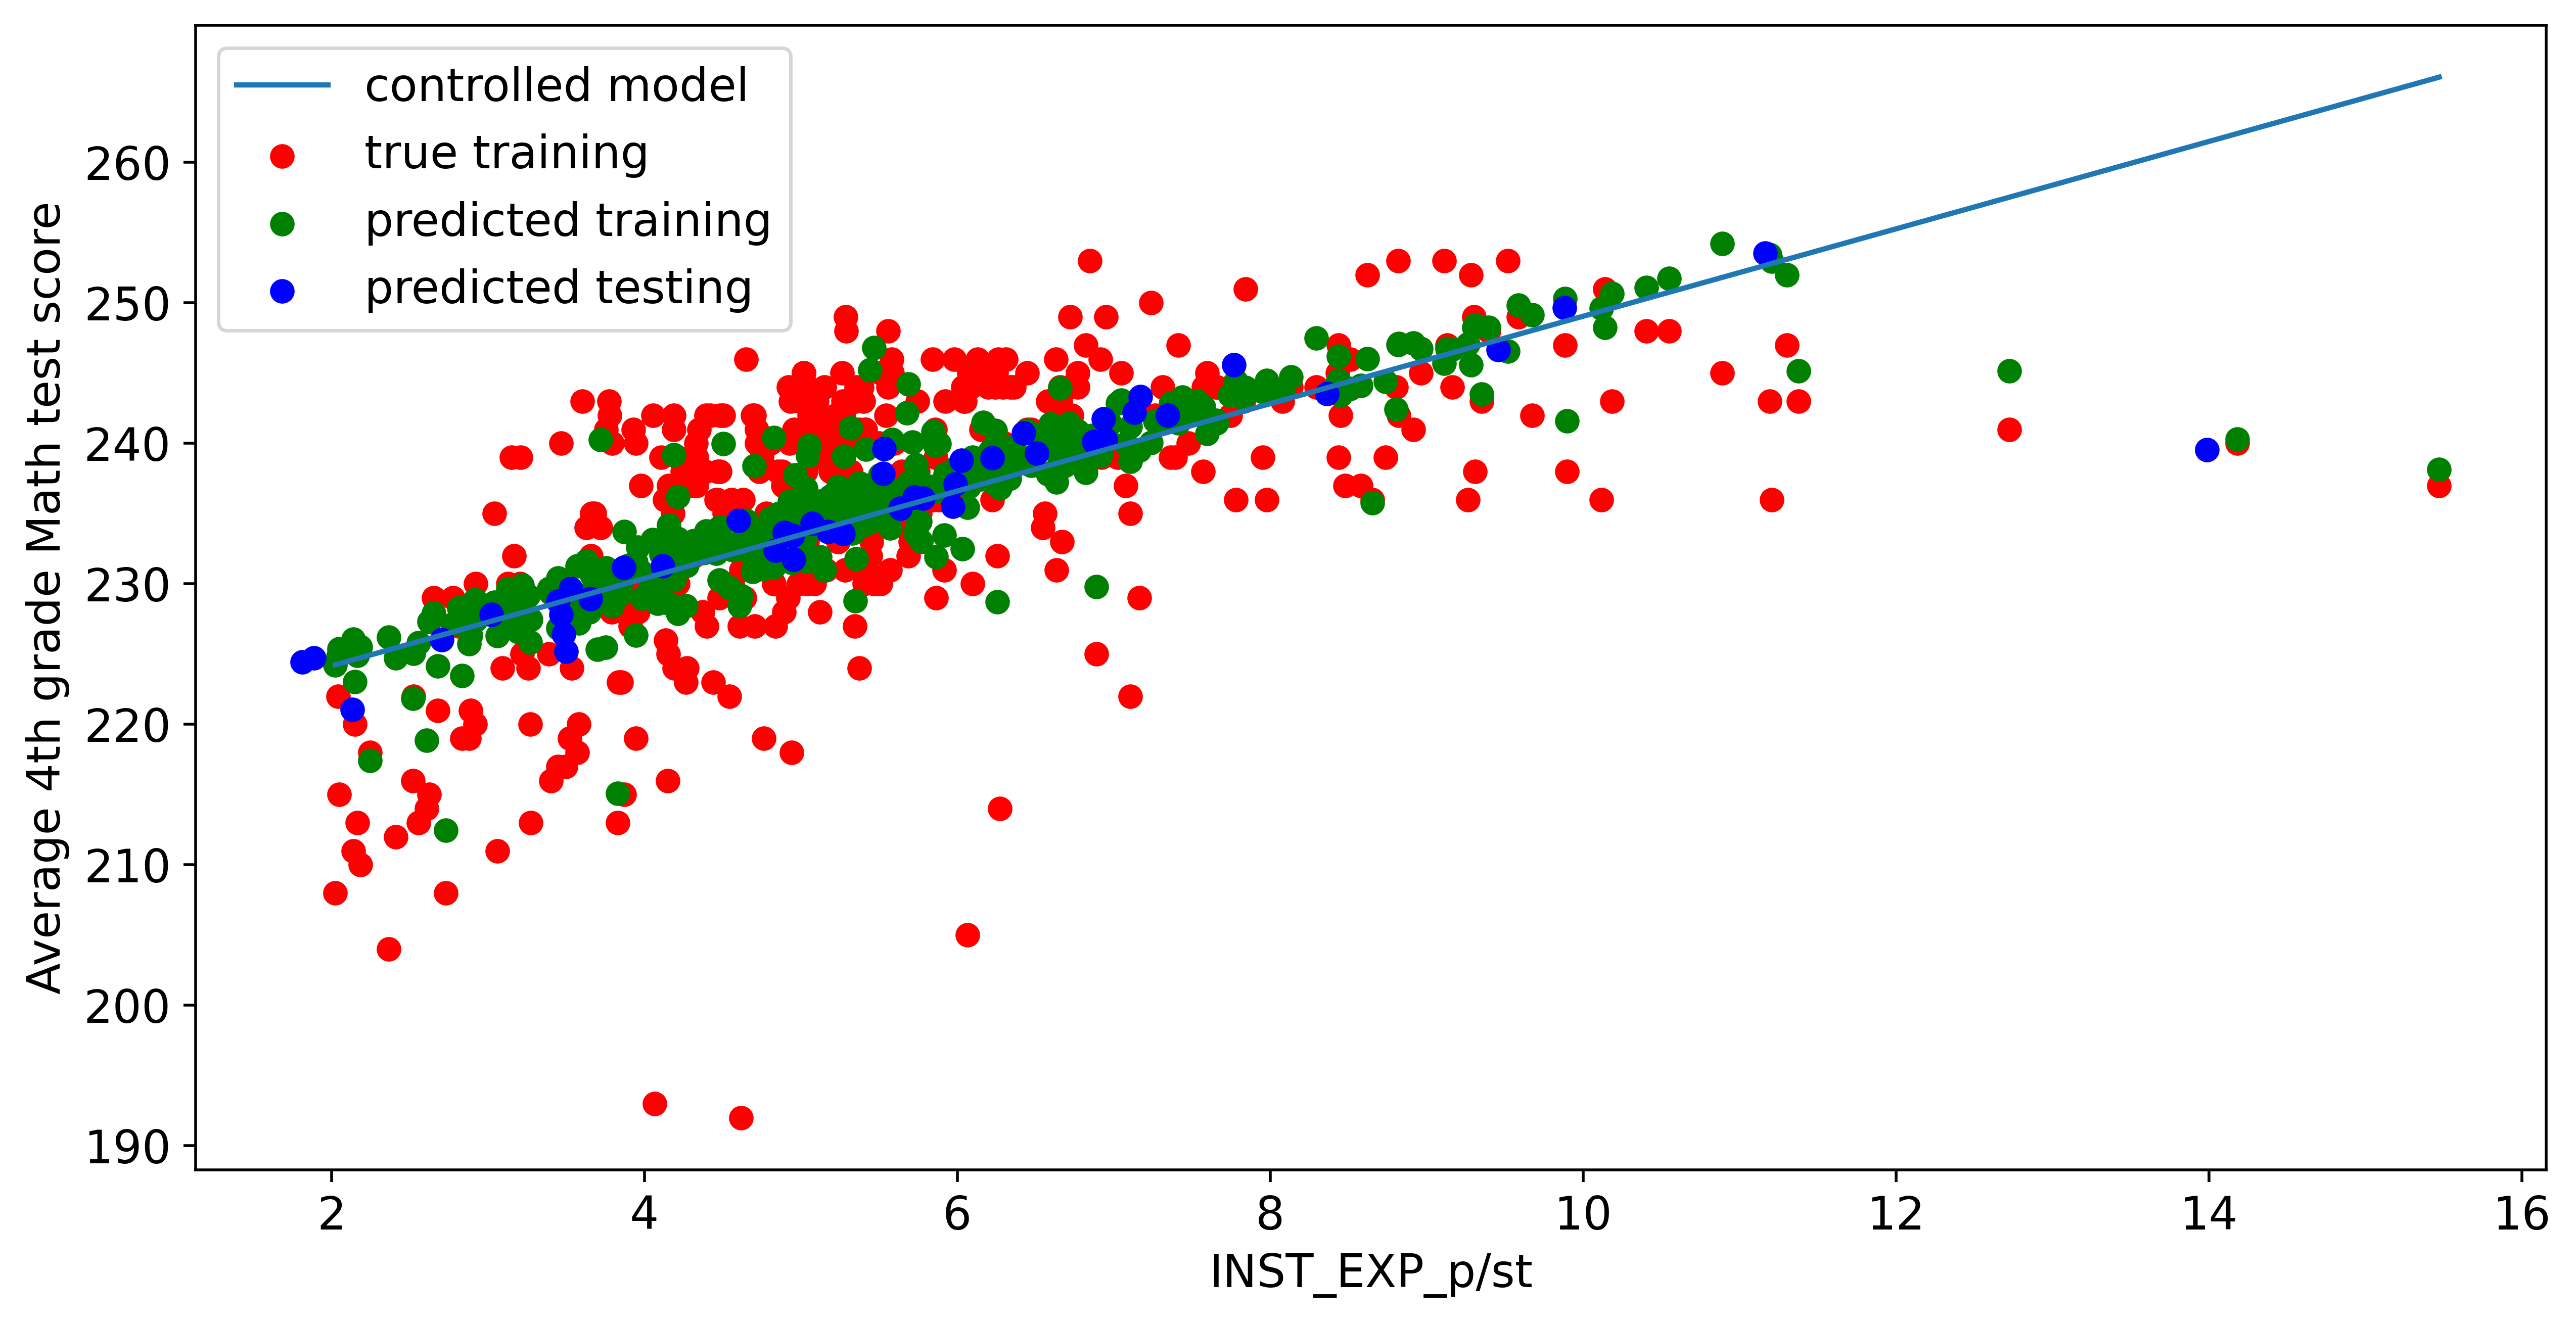

In [141]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "INST_EXP_p/st"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("Average 4th grade Math test score")

<h2> Summary </h2>

In this notebook we worked with the US school education dataset. We explored the features given in the dataset, compared several parameters in different states and in different years. We then reasoned what features could potentially be useful to predict students' test performance. We also added two custom features based on the given data. In particular, we added a feature that indicates how much of the state expenditure corresponds to instruction expenditure. Knowing what percentage of money the state spends on instruction could potentially be helpful.
Finally, we trained a machine learning model (namely, simple linear regression) to attempt to predict the performance using selected features.
<br>
It appears that the model performs poorly given our selected features. This may be due to the fact that these features do not provide sufficient information for accurate predictions, or it could also be the case that the linear model is not powerful enough to capture the relationship.
<br>
However, we could use this model to determine what features out the selected set the model considers as more important, and we could then feed those features to another model.